In [1]:
import pandas as pd
from scipy.stats import rankdata
import matplotlib.pyplot as plt

In [2]:
# Load data
l2p_regression = pd.read_feather("../data/2025-12-04-19:27:56_l2p_regression_gender_and_age.feather")
p2l_regression = pd.read_feather("../data/2025-12-04-19:27:56_p2l_regression_gender_and_age.feather")
l2p_merged = pd.read_feather("../data/2025-12-04-16:39:25_l2p_merged.feather")
p2l_merged = pd.read_feather("../data/2025-12-04-18:54:47_p2l_merged.feather")

In [3]:
# Preprocess regression data
l2p_regression[['TF', 'Gene']] = l2p_regression['edge'].str.split("_", expand = True)
p2l_regression[['TF', 'Gene']] = p2l_regression['edge'].str.split("_", expand = True)
l2p_regression.index = l2p_regression['edge']
p2l_regression.index = p2l_regression['edge']
p2l_regression = p2l_regression.reindex(l2p_regression.index)
p2l_regression = p2l_regression.drop(columns="edge")
l2p_regression = l2p_regression.drop(columns="edge")

In [4]:
# Add adjusted p values
p = l2p_regression.p_value.values
n = len(p)
ranks = rankdata(p, method='average')
fdr = p * n / ranks
fdr[fdr > 1] = 1
l2p_regression['adj_p'] = fdr


p = p2l_regression.p_value.values
n = len(p)
ranks = rankdata(p, method='average')
fdr = p * n / ranks
fdr[fdr > 1] = 1
p2l_regression['adj_p'] = fdr

In [5]:
# Analyze DPRX edges
l2p_dprx = l2p_regression[l2p_regression['TF'] == "DPRX"].sort_values(by="p_value")
p2l_dprx = p2l_regression[p2l_regression['TF'] == "DPRX"].sort_values(by="p_value")


Text(0, 0.5, 'Beta Score')

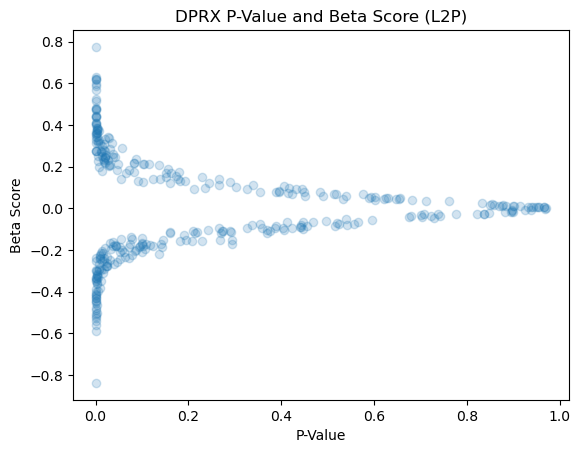

In [6]:
# Scatterplot of L2P DPRX beta score vs p-value
plt.scatter(l2p_dprx['p_value'], l2p_dprx['beta_score'], alpha=0.2)
plt.title("DPRX P-Value and Beta Score (L2P)")
plt.xlabel("P-Value")
plt.ylabel("Beta Score")

Text(0.5, 1.0, 'DPRX P-Value and Beta Score (P2L)')

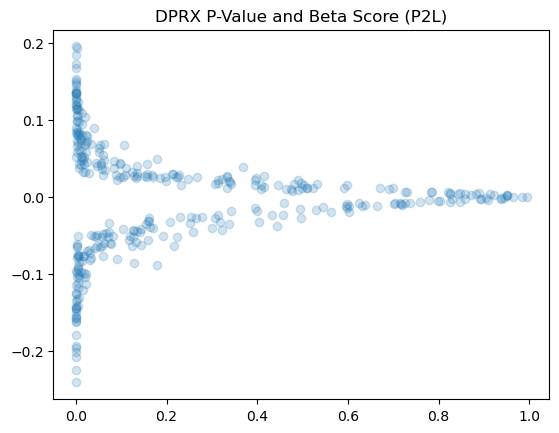

In [7]:
# Scatterplot of L2P DPRX beta score vs p-value
plt.scatter(p2l_dprx['p_value'], p2l_dprx['beta_score'], alpha=0.2)
plt.title("DPRX P-Value and Beta Score (P2L)")

In [8]:
# Calculate average scores DPRX
dprx_cols = l2p_merged.columns[l2p_merged.columns.str.startswith("DPRX")]
l2p_dprx_only = l2p_merged[dprx_cols]

dprx_cols = p2l_merged.columns[p2l_merged.columns.str.startswith("DPRX")]
p2l_dprx_only = p2l_merged[dprx_cols]

l2p_dprx_means = l2p_dprx_only.mean(numeric_only=True)
p2l_dprx_means = p2l_dprx_only.mean(numeric_only=True)

Text(0, 0.5, 'P2L Edge Weight')

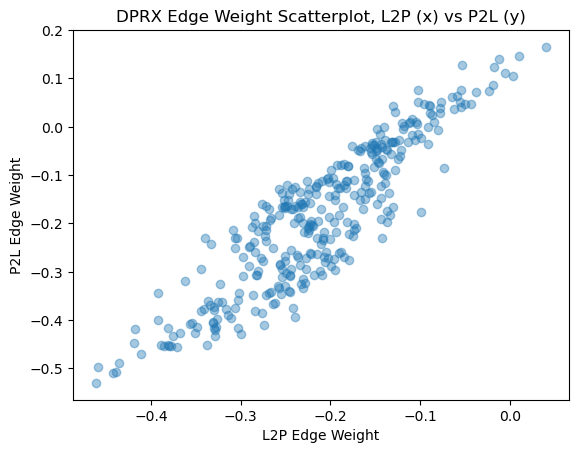

In [9]:
# Scatterplot of # DPRX averages < 2, L2P vs P2L
plt.scatter(l2p_dprx_means[l2p_dprx_means < 2], p2l_dprx_means[p2l_dprx_means < 2], alpha=0.4)
plt.title("DPRX Edge Weight Scatterplot, L2P (x) vs P2L (y)")
plt.xlabel("L2P Edge Weight")
plt.ylabel("P2L Edge Weight")

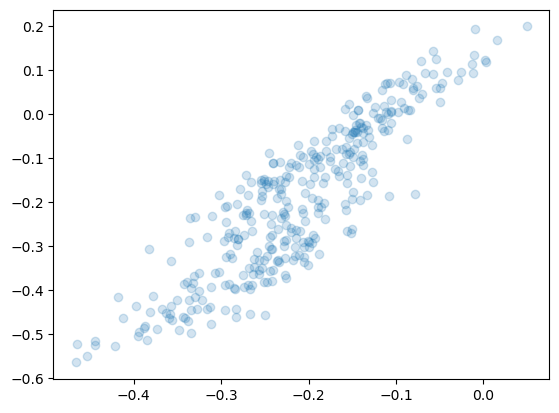

In [10]:
# Analyze DPRX by case
dprx_cols_case = l2p_merged.columns[l2p_merged.columns.str.startswith("DPRX")]
l2p_case_dprx_only = l2p_merged[l2p_merged['disease'] == '2-COPD/Emphysema'][dprx_cols_case]

dprx_cols_case = l2p_merged.columns[l2p_merged.columns.str.startswith("DPRX")]
p2l_case_dprx_only = p2l_merged[p2l_merged['disease'] == '2-COPD/Emphysema'][dprx_cols_case]

p2l_case_dprx_means = p2l_case_dprx_only.mean(numeric_only=True)
l2p_case_dprx_means = l2p_case_dprx_only.mean(numeric_only=True)

plt.scatter(l2p_case_dprx_means[l2p_case_dprx_means < 2], p2l_case_dprx_means[p2l_case_dprx_means < 2], alpha=0.2)

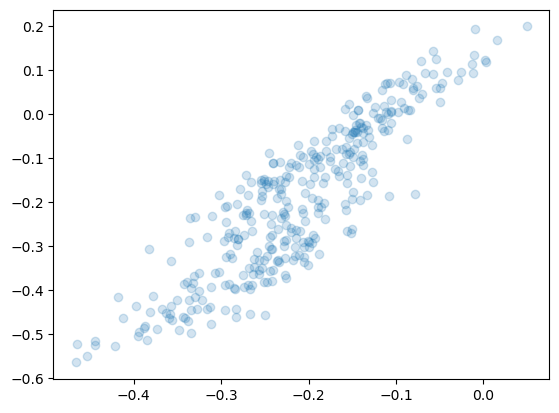

In [11]:
# Analyze DPRX by ctrl
dprx_cols_ctrl = l2p_merged.columns[l2p_merged.columns.str.startswith("DPRX")]
l2p_ctrl_dprx_only = l2p_merged[l2p_merged['disease'] == '1-Control'][dprx_cols_case]

dprx_ctrl_case = l2p_merged.columns[l2p_merged.columns.str.startswith("DPRX")]
p2l_ctrl_dprx_only = p2l_merged[p2l_merged['disease'] == ''][dprx_cols_case]

p2l_ctrl_dprx_means = p2l_case_dprx_only.mean(numeric_only=True)
l2p_ctrl_dprx_means = l2p_case_dprx_only.mean(numeric_only=True)

plt.scatter(l2p_ctrl_dprx_means[l2p_case_dprx_means < 2], p2l_ctrl_dprx_means[p2l_case_dprx_means < 2], alpha=0.2)